In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [107]:
""" Readme:
    Predicting prices of houses (kaggle dateset)
"""

' Readme:\n    \n'

In [108]:
df = pd.read_csv('../DATA/kc_house_data.csv')

Let's take a look on the 5 first data indexes of dataset

In [109]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Checking any missing data in the dataset:

In [110]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Statistical describe

In [111]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Exploratory Analysis

It's possible to see that most of houses are around 0 to 1000000 $ and there are some expensive ones, some outliers...

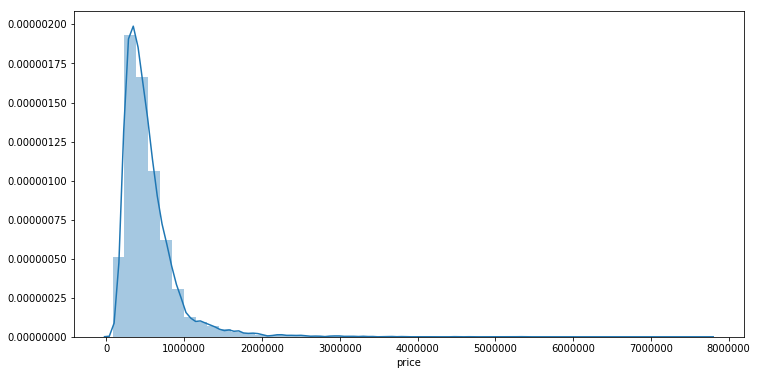

In [112]:
plt.figure(figsize = (12,6))
sns.distplot(df['price'])

Common number of bedrooms are around 3 and 4... and one has 33?

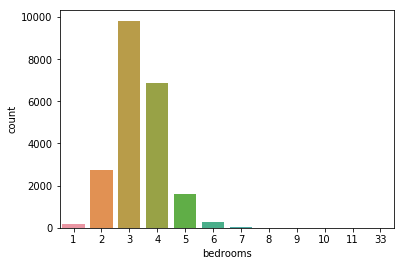

In [113]:
sns.countplot(df['bedrooms'])

In [114]:
df['bedrooms'].max() # yep!

33

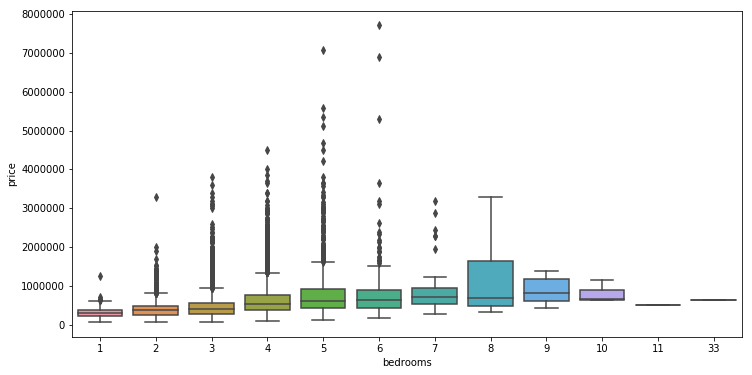

In [115]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'bedrooms', y = 'price', data = df)

Correlation between features and price

In [116]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

Best correlated feature is the sqft_living:

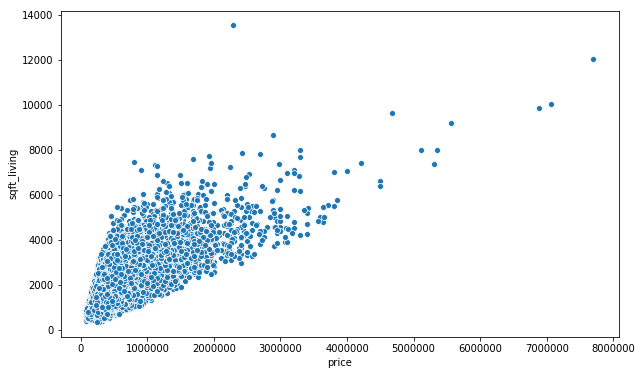

In [117]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'price', y = 'sqft_living', data= df)

Now, let's take a look at coordenates:

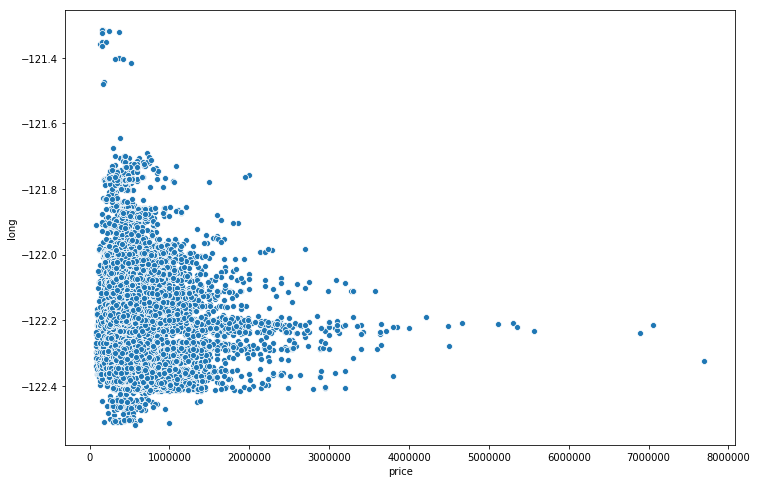

In [118]:
plt.figure(figsize = (12,8))
sns.scatterplot(x='price', y = 'long', data = df)

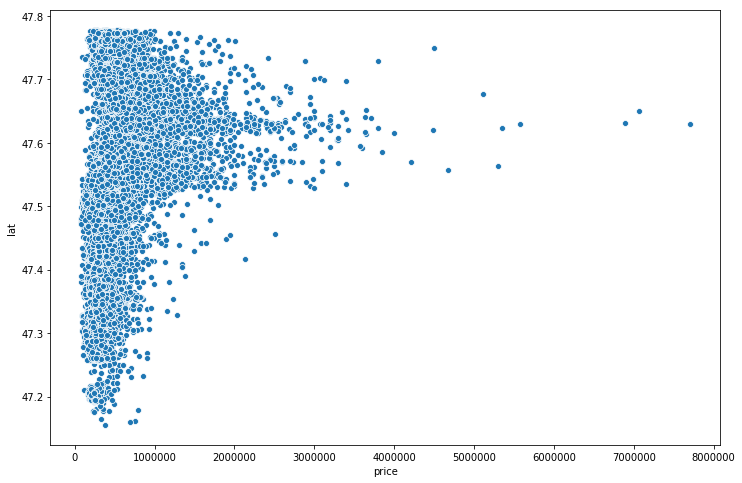

In [119]:
plt.figure(figsize = (12,8))
sns.scatterplot(x='price', y = 'lat', data = df)

Both coordenates together.. and it seems to be a map. It is possible to see
that expensive houses are around one especific area...

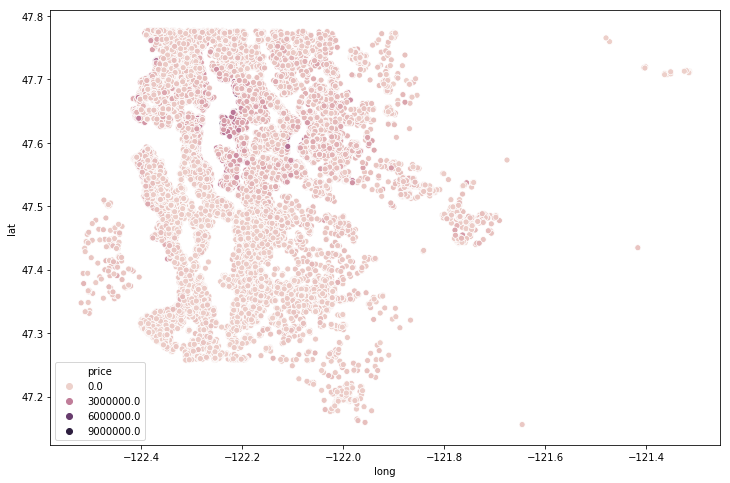

In [120]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'long', y = 'lat', data = df, hue = 'price')

sorting 20 more expensive houses. And removing 1% of it...

In [ ]:
df.sort_values('price', ascending = False).head(20)

In [122]:
len(df)*0.01

215.97

In [123]:
non_top_1_perc = df.sort_values('price', ascending = False).iloc[216:]

Now, it is possible to see better 

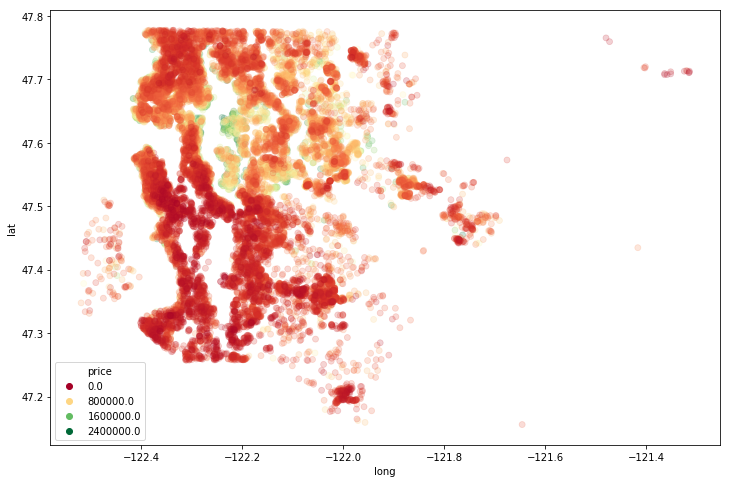

In [124]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'long', y = 'lat', data = non_top_1_perc, 
                hue = 'price', edgecolor = None, alpha = 0.2,
               palette = 'RdYlGn')

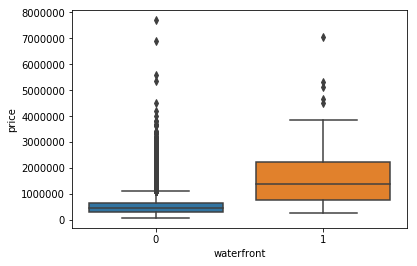

In [125]:
sns.boxplot(x = 'waterfront', y = 'price', data = df)

Cleaning the dataset

In [126]:
df.drop('id', axis =1, inplace = True)

In [127]:
df['date'] = pd.to_datetime(df['date'])

In [128]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [129]:
df = df.drop('date', axis = 1)

In [130]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


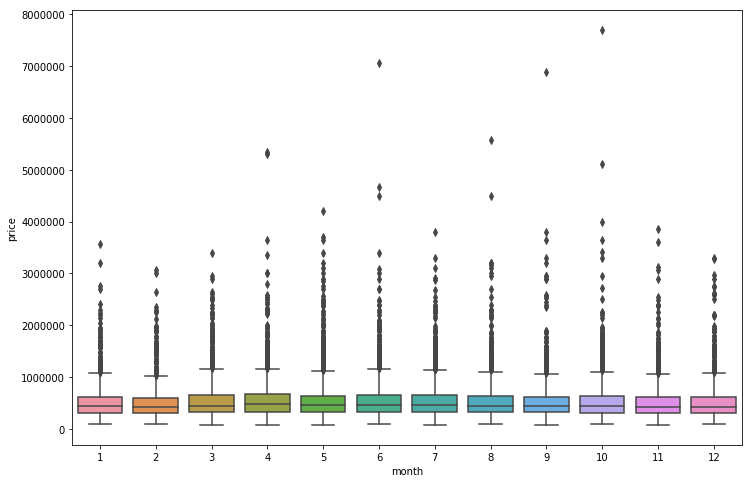

In [131]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'month', y = 'price', data = df)

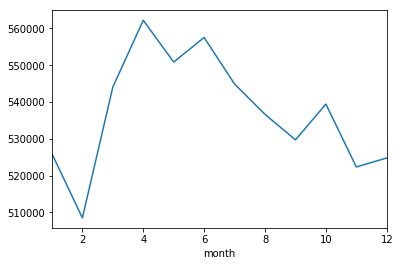

In [132]:
df.groupby('month').mean()['price'].plot()

In [133]:
df = df.drop('zipcode', axis =1)

### Split and Train data

In [134]:
X = df.drop('price', axis =1).values
y = df['price'].values

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state = 101)

In [137]:
from sklearn.preprocessing import MinMaxScaler

In [138]:
scaler = MinMaxScaler()

In [139]:
X_train = scaler.fit_transform(X_train)

In [140]:
X_test = scaler.transform(X_test)

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [142]:
X_train.shape

(15117, 19)

In [143]:
model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), 
         batch_size = 128, epochs = 400)

### Model Evaluation

In [85]:
losses = pd.DataFrame(model.history.history)

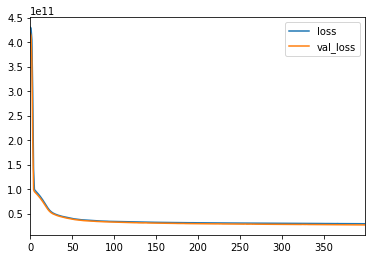

In [86]:
losses.plot()

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [89]:
pred = model.predict(X_test)

In [91]:
mean_squared_error(y_test,pred)**0.5

163632.9404751102

In [92]:
mean_absolute_error(y_test, pred)

100836.20953414352

In [94]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [95]:
explained_variance_score(y_test, pred)

0.7980973245905759

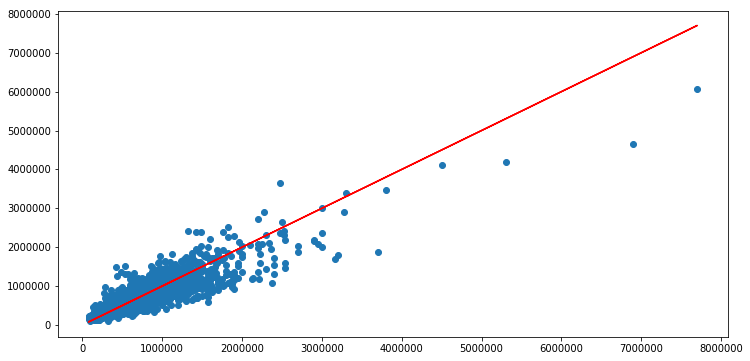

In [98]:
plt.figure(figsize = (12,6))
plt.scatter(y_test, pred)
plt.plot(y_test, y_test, 'r')

New data prediction 

In [100]:
single_house = df.drop('price', axis = 1).iloc[0]

In [103]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [104]:
model.predict(single_house)

array([[275390.28]], dtype=float32)

In [105]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
